In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
!pip list

Package                      Version
---------------------------- ----------
absl-py                      2.1.0
annotated-types              0.7.0
asttokens                    2.4.1
astunparse                   1.6.3
blinker                      1.7.0
blis                         0.7.11
cachetools                   5.3.3
catalogue                    2.0.10
certifi                      2024.2.2
charset-normalizer           3.3.2
click                        8.1.7
cloudpathlib                 0.16.0
colorama                     0.4.6
comm                         0.2.2
confection                   0.1.4
contourpy                    1.2.1
cycler                       0.12.1
cymem                        2.0.8
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
Flask                        3.0.2
flask-ngrok                  0.0.25
flatbuffers                  24.3.25
fonttools                    4.52.4
fu

In [5]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# !pip install pydot

In [3]:

# Import library
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import json
import pickle
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Input, Embedding, LSTM, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from keras.utils.vis_utils import plot_model
import string
import random

# What is SGD? Stochastic Gradient Descent
# What is it for? To optimize the model
# Why use SGD? Because SGD is the most commonly used optimizer
# What are the advantages of SGD? Fast convergence speed
# What are the disadvantages of SGD? Unstable
# What is the solution to the disadvantages of SGD? Using a small learning rate
# What is a learning rate? The learning rate is a hyperparameter that determines how big a step is taken when optimizing the model
# What is a hyperparameter? Hyperparameters are parameters used to optimize the model
# What is a parameter? Parameters are variables whose values are changed by the model to optimize the model

In [4]:
# Initialize cleaner

lemmatizer=WordNetLemmatizer()
punc=string.punctuation
stop_words=stopwords.words('english')

In [9]:
# Json file
# 1.
with open("./Dataset/intents.json",encoding="utf-8") as file:
    intents=json.load(file)

# 2.
# data_file=open("intents.json").read() # return string type
# intents=json.loads(data_file)
# print(type(intents))

In [10]:
intents["intents"][0]

{'tag': 'greeting',
 'patterns': ['Hi there',
  'How are you?',
  'How are u?',
  'How are yu?',
  'Hello',
  'Helo',
  'Hw are you?',
  'How are yo?',
  'Hw ar you?',
  'Is anyone there?',
  'Hey',
  'Hola',
  'Good day',
  'Hai',
  'Hei',
  'Ello'],
 'responses': ['Hello, thanks for asking',
  'Good to see you again',
  'Hi there, how can I help?'],
 'context': ['']}

In [11]:
# function to clean
def remove_punctuation(w_list):
    return [word for word in w_list if word not in punc]

def remove_stopwords(w_list):
    return [word for word in w_list if word not in stop_words]

def remove_number(w_list):
    return [word for word in w_list if not word.isdigit()]

def get_tag(tag):
    if tag.startswith('j'):
        return 'a'
    elif tag.startswith('v'):
        return 'v'
    elif tag.startswith('n'):
        return 'n'
    elif tag.startswith('r'):
        return 'r'
    else:
        return None

def lemmatize(w_list):
    lemmatized=[]
    tagging=pos_tag(w_list)
    for word,tag in tagging:
        tag=get_tag(tag.lower())
        if tag is None:
            lemmatized.append(word)
        else:
            lemmatized.append(lemmatizer.lemmatize(word,tag))
    return lemmatized

In [12]:
# test=word_tokenize("I am, a student")
# print(remove_punctuation(test))

In [13]:
# intents["intents"][0]

In [14]:
# Populating the lists
words=[]
classes=[]
documents=[]
for intent in intents["intents"]:
    for pattern in intent["patterns"]:
        # print("pattern: ->",pattern)
        
        # tokenize it
        word_list=word_tokenize(pattern)
        word_list=[word.lower() for word in word_list]
        # word_list=remove_punctuation(word_list)
        # word_list=remove_stopwords(word_list)
        words.extend(word_list)
        
        # print(words)
        
        # add documents
        documents.append((word_list,intent["tag"].strip()))
        
        # add classes to class list
        if intent["tag"].strip() not in classes:
            classes.append(intent["tag"].strip())

words=remove_punctuation(words)
words=remove_stopwords(words)
# words=remove_number(words)
words=lemmatize(words)

# words=sorted(set(words))

classes=sorted(set(classes))
# print(words)
print(len(documents),"Documents:",documents)
print(len(classes),"Classes:",classes)
print(len(words),"Unique lemmatized words: ",words)

950 Documents: [(['hi', 'there'], 'greeting'), (['how', 'are', 'you', '?'], 'greeting'), (['how', 'are', 'u', '?'], 'greeting'), (['how', 'are', 'yu', '?'], 'greeting'), (['hello'], 'greeting'), (['helo'], 'greeting'), (['hw', 'are', 'you', '?'], 'greeting'), (['how', 'are', 'yo', '?'], 'greeting'), (['hw', 'ar', 'you', '?'], 'greeting'), (['is', 'anyone', 'there', '?'], 'greeting'), (['hey'], 'greeting'), (['hola'], 'greeting'), (['good', 'day'], 'greeting'), (['hai'], 'greeting'), (['hei'], 'greeting'), (['ello'], 'greeting'), (['bye'], 'goodbye'), (['see', 'you', 'later'], 'goodbye'), (['goodbye'], 'goodbye'), (['nice', 'chatting', 'to', 'you', ',', 'bye'], 'goodbye'), (['till', 'next', 'time'], 'goodbye'), (['thanks'], 'thanks'), (['thank', 'you'], 'thanks'), (['that', "'s", 'helpful'], 'thanks'), (['awesome', ',', 'thanks'], 'thanks'), (['thanks', 'for', 'helping', 'me'], 'thanks'), (['woww', ',', 'thankss'], 'thanks'), ([], 'noanswer'), ([], 'noanswer'), ([], 'noanswer'), ([], 'n

In [15]:
for i,test in enumerate(classes):
    if test =="Support Vector Machine":
        print(f"{i} found")

79 found


In [16]:
with open("./Dataset/words.pkl","wb") as f:
    pickle.dump(words,f)
with open("./Dataset/classes.pkl","wb") as f:
    pickle.dump(classes,f)
with open("./Dataset/documents.pkl","wb") as f:
    pickle.dump(documents,f)

In [17]:
# Initialize training data

training=[]
output_empty=[0]*len(classes)
for doc in documents:
    
    # bag of word
    bag=[]
    
    # list of tokenized words for pattern
    pattern_words=doc[0]
    pattern_words=remove_punctuation(pattern_words)
    pattern_words=remove_stopwords(pattern_words)
    # pattern_words=remove_number(pattern_words)
    pattern_words=lemmatize(pattern_words)
    
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    output_row=output_empty.copy()
    # print(output_row)
    output_row[classes.index(doc[1])]=1
    # print(output_row)
    # print(output_row.index(1))
    # break
    
    # print(len(bag))
    # print(len(output_row))
    
    training.append([bag,output_row])

    # print(bag)
    # print(output_row)

    
    # print(training[0][0])
    # print(training[0][1])
    # break
    
# print(len(training))

# Shuffle features
random.shuffle(training)

# Cara 1
train_x=[item[0] for item in training]
train_y=[item[1] for item in training]

print(len(train_x))
print(len(train_y))


# Cara 2
# training_data=np.array(training)
# # print(training_data)

# train_x=list(training_data[:,0])
# train_y=list(training_data[:,1])

# print(train_x.shape)
# print(train_y.shape)

train_x=np.array(train_x)
train_y=np.array(train_y)

print("Training data created!")

# print("train_x:",train_x)
# print("train_y:",train_y)



950
950
Training data created!


In [18]:
train_x,len(train_x[0])

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 3278)

In [19]:
train_y,len(train_y[0])

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 256)

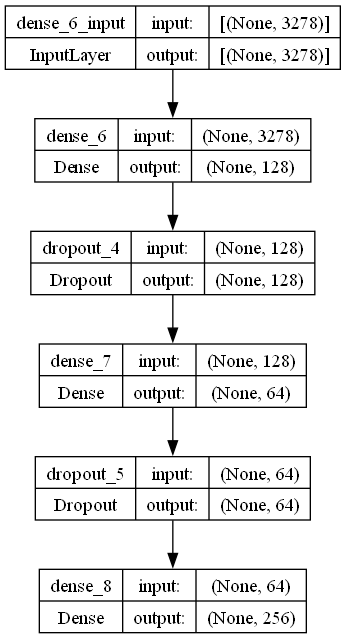

In [24]:
# Training model

# adam=Adam(learning_rate=0.001)
# rmsprop=RMSprop(learning_rate=0.001)
# adagrad=Adagrad(learning_rate=0.01)
# nadam=Nadam(learning_rate=0.001,beta_1=-0.9,beta_2=0.999)

model=Sequential()
model.add(Dense(128,input_shape=(len(train_x[0]),),activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
# model.add(Dense(32,activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(len(train_y[0]),activation='softmax'))


# sgd=SGD(learning_rate=0.01,decay=1e-6,momentum=0.5,nesterov=True)
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])
plot_model(model,show_shapes=True,show_layer_names=True)

In [25]:
hist=model.fit(train_x,train_y,epochs=150,batch_size=2,verbose=1,callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=15,verbose=1))
model.save("./Model/Model_Chatbot_Personal.h5",hist)

print("Model Created!")

Epoch 1/150
475/475 [==============================] - 6s 5ms/step - loss: 5.3616 - accuracy: 0.0411
Epoch 2/150
475/475 [==============================] - 1s 1ms/step - loss: 4.0285 - accuracy: 0.1926
Epoch 3/150
475/475 [==============================] - 1s 2ms/step - loss: 2.9407 - accuracy: 0.3253
Epoch 4/150
475/475 [==============================] - 1s 2ms/step - loss: 2.2080 - accuracy: 0.4389
Epoch 5/150
475/475 [==============================] - 1s 1ms/step - loss: 1.8311 - accuracy: 0.5116
Epoch 6/150
475/475 [==============================] - 1s 1ms/step - loss: 1.5480 - accuracy: 0.5684
Epoch 7/150
475/475 [==============================] - 1s 2ms/step - loss: 1.3423 - accuracy: 0.6232
Epoch 8/150
475/475 [==============================] - 1s 2ms/step - loss: 1.2408 - accuracy: 0.6463
Epoch 9/150
475/475 [==============================] - 1s 2ms/step - loss: 1.0354 - accuracy: 0.7063
Epoch 10/150
475/475 [==============================] - 1s 2ms/step - loss: 1.0055 - accura

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3278)]            0         
                                                                 
 dense_9 (Dense)             (None, 128)               419712    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 256)               16640     
                                                                 
Total params: 444,608
Trainable params: 444,608
Non-trainable params: 0
_________________________________________________________________


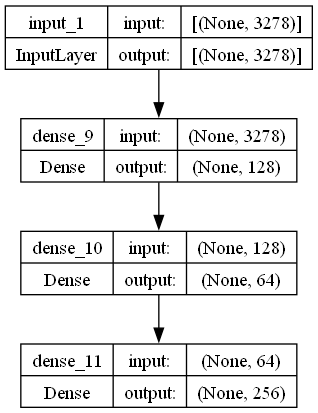

In [26]:
input_layer = Input(shape=(len(train_x[0])))
layer1 = Dense(128,activation='relu')(input_layer)
layer2 = Dense(64,activation='relu')(layer1)
output = Dense(len(train_y[0]),activation='softmax')(layer2)

#Creating a model
model = Model(inputs=input_layer,outputs=output)
model.summary()

model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['accuracy'])
plot_model(model,show_shapes=True,show_layer_names=True)

In [27]:
model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=1,callbacks=tf.keras.callbacks.EarlyStopping(monitor="loss",verbose=1,patience=10))
model.save("./Model/Model_Chatbot_Personal_2.h5",hist)
print("Model Created!")

Epoch 1/100
950/950 [==============================] - 5s 5ms/step - loss: 5.2329 - accuracy: 0.0726
Epoch 2/100
950/950 [==============================] - 2s 2ms/step - loss: 3.1917 - accuracy: 0.2589
Epoch 3/100
950/950 [==============================] - 1s 1ms/step - loss: 1.9614 - accuracy: 0.4568
Epoch 4/100
950/950 [==============================] - 2s 3ms/step - loss: 1.3335 - accuracy: 0.6053
Epoch 5/100
950/950 [==============================] - 3s 3ms/step - loss: 1.0552 - accuracy: 0.6705
Epoch 6/100
950/950 [==============================] - 2s 2ms/step - loss: 0.7966 - accuracy: 0.7621
Epoch 7/100
950/950 [==============================] - 3s 3ms/step - loss: 0.7221 - accuracy: 0.7853
Epoch 8/100
950/950 [==============================] - 2s 3ms/step - loss: 0.5531 - accuracy: 0.8284
Epoch 9/100
950/950 [==============================] - 2s 2ms/step - loss: 0.4745 - accuracy: 0.8389
Epoch 10/100
950/950 [==============================] - 2s 2ms/step - loss: 0.4759 - accura

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# # Initialize Random Forest classifier
# model = RandomForestClassifier(n_estimators=100)

# # Training the model
# model.fit(train_x, train_y)

# # Evaluating the model
# accuracy = model.score(train_x, train_y)
# print("Accuracy:", accuracy)

In [ ]:
# !pip list

In [ ]:
print(lemmatizer.lemmatize("running",pos="v"))

run


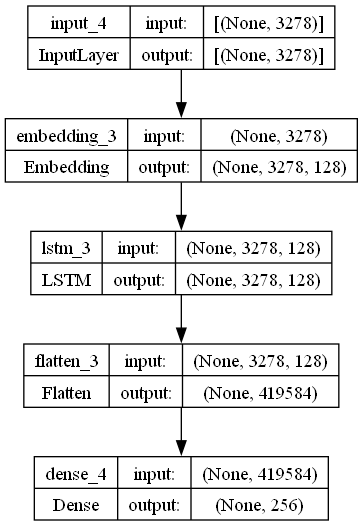

In [ ]:
i = Input(shape=(len(train_x[0]),))
x = Embedding(len(train_x[0]),128)(i)
x = LSTM(128,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(len(train_y[0]),activation="softmax")(x)
model = Model(i,x)

sgd=SGD(learning_rate=0.01,decay=1e-6,momentum=0.5,nesterov=True)
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=["accuracy"])
plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
hist=model.fit(train_x,train_y,epochs=50,batch_size=5,verbose=1, workers=4, use_multiprocessing=True)
model.save("./Model/Model_Chatbot_Personal_LSTM.h5",hist)

print("Model Created!")

Epoch 1/50
190/190 [==============================] - 31s 157ms/step - loss: 5.5459 - accuracy: 0.0147
Epoch 2/50
190/190 [==============================] - 31s 164ms/step - loss: 5.0920 - accuracy: 0.0663
Epoch 3/50
190/190 [==============================] - 32s 168ms/step - loss: 3.3855 - accuracy: 0.2705
Epoch 4/50
190/190 [==============================] - 31s 162ms/step - loss: 2.2841 - accuracy: 0.4737
Epoch 5/50
190/190 [==============================] - 30s 157ms/step - loss: 1.7688 - accuracy: 0.6032
Epoch 6/50
190/190 [==============================] - 30s 156ms/step - loss: 1.4807 - accuracy: 0.6937
Epoch 7/50
190/190 [==============================] - 30s 158ms/step - loss: 1.1641 - accuracy: 0.7600
Epoch 8/50
190/190 [==============================] - 29s 153ms/step - loss: 0.9270 - accuracy: 0.7821
Epoch 9/50
190/190 [==============================] - 30s 156ms/step - loss: 0.9116 - accuracy: 0.8074
Epoch 10/50
190/190 [==============================] - 30s 158ms/step - l